# Question 1

## In this question we will:
* Learn to load, save, and display images.
* Learn basic display of figures (plt.figure())
* Learn basic image manipulation:
	* data type conversion
	* colour to grayscale

**To begin, follow the instructions in the code comments marked with `TODO`.**

The contrast_adjust png has datatype: uint8
The contrast_adjust png after conversion has datatype: float64


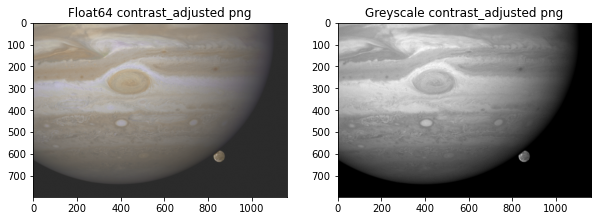

In [ ]:
# Boilerplate imports
%matplotlib inline  

import skimage.io as io
import matplotlib.pyplot as plt
import skimage.util as util
import skimage.color as color


# TODO Load the provided jupiter_hs-2008-contrast-adjusted.png 
# file and print out its data type.

image1 = io.imread("jupiter_hs-2008-contrast-adjusted.png")
print(f"The contrast_adjust png has datatype: {image1.dtype}")


# TODO Convert the image to data type float using 
# skimage.util.img_as_float().  (Check out the documentation 
# for skimage.util.  You'll find a full suite of img_as_XXXX() 
# functions for converting to any data type you want.)

image1_float = util.img_as_float(image1)


# TODO Print the data type of the new image; it should be float64.

print(f"The contrast_adjust png after conversion has datatype: {image1_float.dtype}")


# TODO Display the float64 version of the image; add an appropriate title with plt.title().

fig1, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].imshow(image1_float)
axes[0].set_title("Float64 contrast_adjusted png")


# TODO Display a grayscale version of the image with an appropriate title 
# Hint: use skimage.color.rgb2gray().  After you've done this,
# make sure you read the text block below this code block if
# you get a result you didn't expect.

image1_gray = color.rgb2gray(image1_float)

axes[1].imshow(image1_gray, cmap='gray')
axes[1].set_title("Greyscale contrast_adjusted png")

plt.show()

If you got this far, you're probably wondering why your grayscale image didn't display as grayscale?  It's because the default matplotlib colour map for grayscale images is a false-colour scale.  To force grayscale display, go back and add the arguement: 

	cmap='gray' 

to the call to imshow() above. After doing that, the image should appear grayscale.

Another thing you should know is that imshow() normalizes the display of grayscale images by default. 
This means that by default, contrast is adjusted so that the darkest pixels in the image are shown as black (even if they aren't actually black) and the brightest are shown as white (even if they aren't actually white) and other intensities are linearly interpolated inbetween.  You can observe the normalization by noticing that they black background in the grayscale image is a lot darker than the black background in the colour image.

Normalization is often fine and sometimes desired, but be aware that if you want to see what your image **really** looks like, you need to add arguments: `vmin=0` and `vmax=1` to your imshow() call.  

Try this now; make another figure just like the previous one, but without the normalization by adding arguments `vmin=0` and `vmax=1` to imshow().  Don't forget to also add `cmap='gray'`.

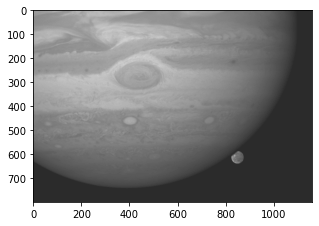

In [26]:
# TODO Display the greyscale jupiter image again without normalization
# as described in the paragraph above.
fig2 = plt.figure(figsize=(5,5))
plt.imshow(image1_gray, cmap='gray', vmin=0, vmax=1)

Observe how the non-normalized version has less contrast. This is the actual appearance of your image.  The normalization is only advantageous for visualization.  Sometimes images have such low contrast that you want to normalize them to view them.  However, for quantitative purposes, you should always be aware of the true appearance of your images, so get in the habit of using vmin=0 and vmax = 1.

You can set the colour map to be 'gray' by default using the following code:
 
	plt.rcParams['image.cmap'] = 'gray'

Unfortunately there is no way to set defaults for vmin and vmax.

Note that cmap, vmin, and vmax are completely ignored for colour images. You can see this is true -- look at the colour figure and note how the background intensity is the same as the non-normalized grayscale figure, and different from the normalized grayscale figure.